In [9]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


data = pd.read_csv('gesture_data3.csv')

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('gesture_data_preproc.csv')

# Clean the data
data = data.dropna()  # Remove rows with missing values

# Remove rows where any coordinate values are zero
data = data[(data.drop('label', axis=1) != 0).all(axis=1)]

# Removing outliers
# Define a function to remove outliers based on Z-score (threshold = 3)
from scipy.stats import zscore
def remove_outliers(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=[float]))
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]

X = data.drop('label', axis=1).astype(float)
y = data['label']

# Apply outlier removal
X = remove_outliers(X)

# Ensure y contains only indices from X after outlier removal
y = y.loc[X.index]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Function to evaluate and plot metrics, and print classification report
def evaluate_and_report(clf, X_test, y_test, clf_name):
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{clf_name} Accuracy: {accuracy}")
    print(f"{clf_name} Precision: {precision}")
    print(f"{clf_name} Recall: {recall}")
    print(f"{clf_name} F1 Score: {f1}")

     # Classification Report
    report = classification_report(y_test, y_pred, target_names= y.unique(), output_dict=True)
    print(f"\n{clf_name} Classification Report:\n{report}")


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{clf_name} Confusion Matrix')
    plt.show()

    # Plot accuracy, precision, recall, and f1 score
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    plt.figure(figsize=(10, 5))
    plt.bar(metrics.keys(), metrics.values())
    plt.title(f'{clf_name} Metrics')
    plt.show()
    
# Train an SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Train a Random Forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Train a Neural Network classifier
mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X_train, y_train)
mlp_pred = mlp_clf.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, mlp_pred))

# Train a LightGBM classifier
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)
lgb_pred = lgb_clf.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred))

# train a Logistic Regression classifier
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

# train a extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
et_clf.fit(X_train, y_train)
et_pred = et_clf.predict(X_test)
print("Extra Trees Accuracy:", accuracy_score(y_test, et_pred))



FileNotFoundError: [Errno 2] No such file or directory: 'gesture_data3.csv'

SVM Accuracy: 0.9565217391304348
SVM Precision: 0.9624505928853755
SVM Recall: 0.9565217391304348
SVM F1 Score: 0.9561361226260483

SVM Classification Report:
{'thumbs_up': {'precision': 1.0, 'recall': 0.8333333333333334, 'f1-score': 0.9090909090909091, 'support': 18.0}, 'heart': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0}, 'open_palm': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0}, 'perfect': {'precision': 0.8636363636363636, 'recall': 1.0, 'f1-score': 0.9268292682926829, 'support': 19.0}, 'accuracy': 0.9565217391304348, 'macro avg': {'precision': 0.9659090909090909, 'recall': 0.9583333333333334, 'f1-score': 0.958980044345898, 'support': 69.0}, 'weighted avg': {'precision': 0.9624505928853755, 'recall': 0.9565217391304348, 'f1-score': 0.9561361226260483, 'support': 69.0}}


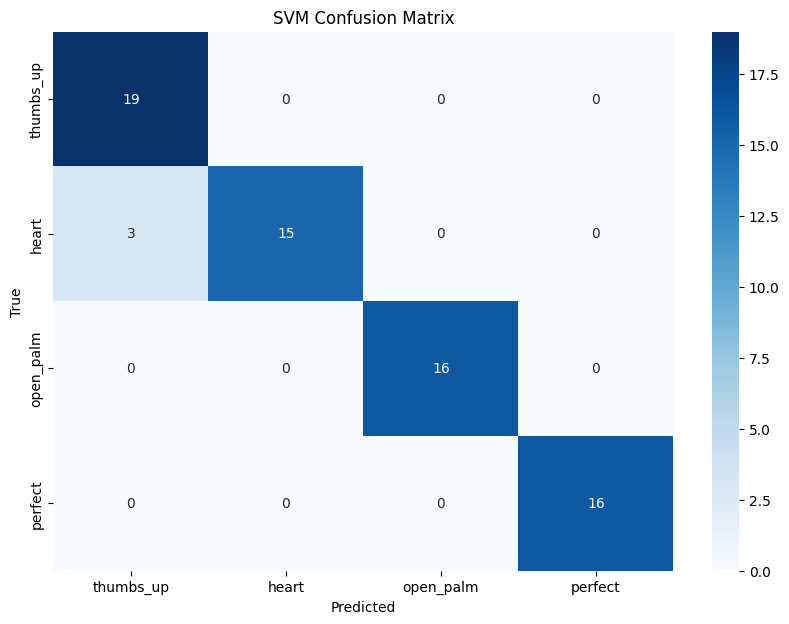

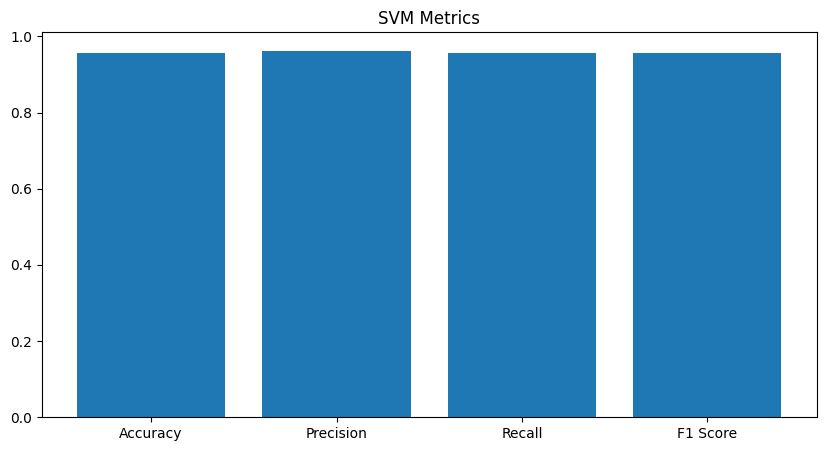

In [17]:
evaluate_and_report(svm_clf, X_test, y_test, "SVM")

Random Forest Accuracy: 0.9710144927536232
Random Forest Precision: 0.9737750172532781
Random Forest Recall: 0.9710144927536232
Random Forest F1 Score: 0.9708866155157715


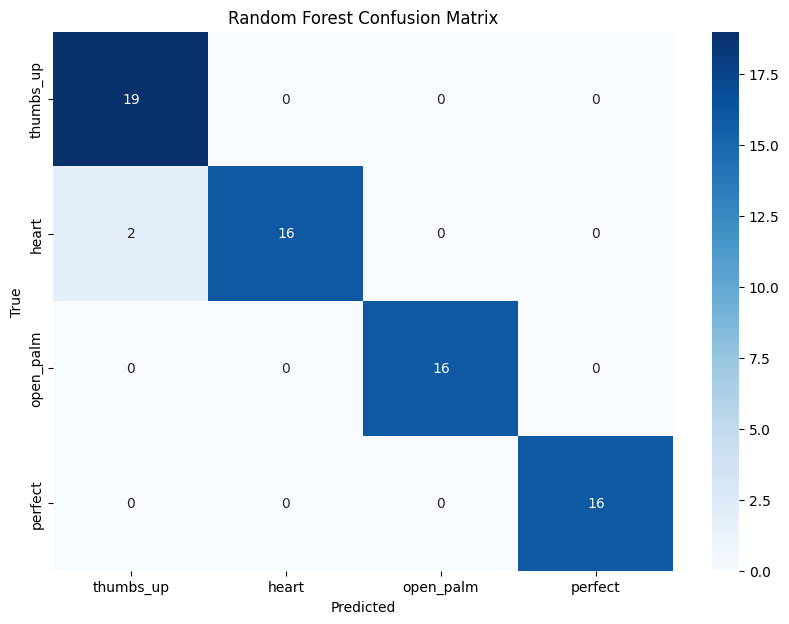

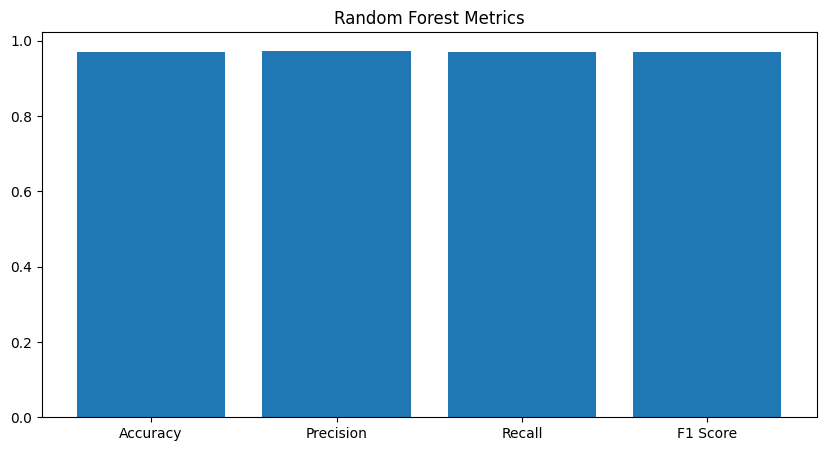

In [4]:
evaluate_and_report(rf_clf, X_test, y_test, "Random Forest")

In [3]:
# Save the best 3 classifiers
joblib.dump(svm_clf, 'svm_gesture_classifier.pkl')
joblib.dump(rf_clf, 'rf_gesture_classifier.pkl')
joblib.dump(mlp_clf, 'mlp_gesture_classifier.pkl')

['mlp_gesture_classifier.pkl']